In [1]:
# Data manipulations
import pandas as pd
import numpy as np
import utils
# Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# Data pre-processing
import missingno as msno
from sklearn.preprocessing import LabelEncoder  
from sklearn.impute import SimpleImputer

# Date handller
import time
from datetime import datetime, timedelta, date

# For serialization and warning purpose
import pickle
import warnings
warnings.filterwarnings('ignore')
pio.renderers.default='notebook' # charts export to HTML
# pd.set_option('display.height', 500)
# pd.set_option('display.max_rows', 500)
# pd.reset_option('display.max_rows')  OR pd.reset_option('all')

/var/folders/7x/ghgnv3fd73d8nnd3dbm1bpvc0000gn/T/ipykernel_2533/1940575012.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
df = pd.read_csv("./DATA/raw_data.csv")

In [62]:
odf = pd.read_csv("./DATA/occ_data.csv")

In [63]:
odf

,Date,Day,Rooms,OOO,StayOver,Arrivals,DueOut,Available,Group Block,Group Picked Up,TransNGTD,TransGTD,Occupied,OccPercent,RoomRev,RevPAR,ADR,Ppl
0,1/1/21,Fri,100,0,99,84,77,1,,,,,99,99.00%,"9,080.47",90.80,91.72,146 / 32
1,1/2/21,Sat,100,1,94,49,54,5,,,,,94,94.95%,"8,485.67",85.71,90.27,133 / 13
2,1/3/21,Sun,100,0,51,35,78,49,,,,,51,51.00%,"3,812.29",38.12,74.75,66 / 0
3,1/4/21,Mon,100,0,54,26,23,46,,,,,54,54.00%,"4,101.90",41.02,75.96,68 / 0
4,1/5/21,Tue,100,0,60,25,19,40,,,,,60,61.00%,"4,430.32",44.30,72.63,76 / 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,12/27/22,Tue,100,0,99,56,56,1,,,,,99,99.00%,"8,840.99",88.41,89.30,159 / 9
726,12/28/22,Wed,100,2,91,49,57,7,,,,,91,92.86%,"7,516.96",76.70,82.60,141 / 10
727,12/29/22,Thu,100,3,91,50,50,6,,,,,91,93.81%,"7,238.00",74.62,79.54,133 / 7
728,12/30/22,Fri,100,0,77,52,66,23,,,,,77,77.00%,"7,155.79",71.56,92.93,119 / 4


In [3]:
df

,Account,Guest Name,Arrive,Depart,Nights,Status,Rate,Rate Code,Type,Room,Source,CRS Conf. No,GTD,Reserve Date,User,Shared Account,Track Code,Package,Cancellation Date,CXL User ID
0,735861591,"Coyle, James",1/1/2021,1/8/2021,7,O,65,LPSS,NK,310.0,DIRECT,NaN,DB,1/1/2021,gm.al523,N,CORPORATE,NaN,NaN,NaN
1,735956058,"TATE, ELLIESHA",1/2/2021,1/3/2021,1,O,SRD RATE,SRD Rate,NQQ,425.0,CRS,81520214.0,DB,1/2/2021,CRS,N,LEISURE,NaN,NaN,NaN
2,736040625,"Allen, Rodney",1/3/2021,1/7/2021,4,O,70,LPSS,NQQ,220.0,DIRECT,NaN,DB,1/3/2021,cbenso.al523,N,CORPORATE,NaN,NaN,NaN
3,736040622,"Bolton, Scotti",1/3/2021,1/8/2021,5,O,70,LPSS,NK,331.0,DIRECT,NaN,DB,1/3/2021,cbenso.al523,N,CORPORATE,NaN,NaN,NaN
4,736040688,"Burton, Kevin",1/3/2021,1/8/2021,5,O,70,LPSS,NQQ,423.0,DIRECT,NaN,DB,1/3/2021,cbenso.al523,N,CORPORATE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33740,847608903,"CRAWFORD, QUENTERRIO",10/26/2023,10/29/2023,3,R,100.04,SSO,SNQQ,NaN,CRS,42465837.0,CC,12/18/2022,CRS,N,NaN,NaN,NaN,NaN
33741,848931985,"Perry, Isiah",10/26/2023,10/29/2023,3,R,126.3,SBOOK,SNQQ1,NaN,CRS,43878886.0,CC,12/29/2022,CRS,N,NaN,NaN,NaN,NaN
33742,848688293,"CRAWFORD, QUENTERRIO",10/27/2023,10/29/2023,2,R,149.96,SSO,SNQQ,NaN,CRS,43617332.0,CC,12/28/2022,CRS,N,NaN,NaN,NaN,NaN
33743,845575808,"LOWMAN, WAYNE",11/4/2023,11/5/2023,1,R,141.55,SSC,NHQQ,NaN,CRS,40223537.0,CC,12/2/2022,CRS,N,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Account', 'Guest Name', 'Arrive', 'Depart', 'Nights', 'Status', 'Rate',
       'Rate Code', 'Type', 'Room', 'Source', 'CRS Conf. No', 'GTD',
       'Reserve Date', 'User', 'Shared Account', 'Track Code', 'Package',
       'Cancellation Date', 'CXL User ID'],
      dtype='object')

In [7]:
df.drop(['Account', 'Guest Name', 'Depart', 'CRS Conf. No', 'GTD', 'Reserve Date', 'User', 'Shared Account', 'Package', 'Cancellation Date', 'CXL User ID'], axis=1, inplace=True)


In [10]:
df

,Date,LOS,Status,Rate,Rate Code,RoomType,Room,Source,Track Code
0,1/1/2021,7,O,65,LPSS,NK,310.0,DIRECT,CORPORATE
1,1/2/2021,1,O,SRD RATE,SRD Rate,NQQ,425.0,CRS,LEISURE
2,1/3/2021,4,O,70,LPSS,NQQ,220.0,DIRECT,CORPORATE
3,1/3/2021,5,O,70,LPSS,NK,331.0,DIRECT,CORPORATE
4,1/3/2021,5,O,70,LPSS,NQQ,423.0,DIRECT,CORPORATE
...,...,...,...,...,...,...,...,...,...
33740,10/26/2023,3,R,100.04,SSO,SNQQ,NaN,CRS,NaN
33741,10/26/2023,3,R,126.3,SBOOK,SNQQ1,NaN,CRS,NaN
33742,10/27/2023,2,R,149.96,SSO,SNQQ,NaN,CRS,NaN
33743,11/4/2023,1,R,141.55,SSC,NHQQ,NaN,CRS,NaN


In [9]:
df.rename(columns = {'Type':'RoomType', 'Nights':'LOS', 'Arrive':'Date'}, inplace = True)

In [12]:
df['Rate'] = df['Rate'].str.replace('SRD RATE', '103.72').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33745 entries, 0 to 33744
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        33745 non-null  object 
 1   LOS         33745 non-null  int64  
 2   Status      33745 non-null  object 
 3   Rate        33745 non-null  float64
 4   Rate Code   33745 non-null  object 
 5   RoomType    33745 non-null  object 
 6   Room        26110 non-null  float64
 7   Source      33745 non-null  object 
 8   Track Code  29414 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.3+ MB


In [23]:
max = df[df['Rate'] == 999]

In [25]:
df = df[df['Rate'] != 999]
df

,Date,LOS,Status,Rate,Rate Code,RoomType,Room,Source,Track Code
0,1/1/2021,7,O,65.00,LPSS,NK,310.0,DIRECT,CORPORATE
1,1/2/2021,1,O,103.72,SRD Rate,NQQ,425.0,CRS,LEISURE
2,1/3/2021,4,O,70.00,LPSS,NQQ,220.0,DIRECT,CORPORATE
3,1/3/2021,5,O,70.00,LPSS,NK,331.0,DIRECT,CORPORATE
4,1/3/2021,5,O,70.00,LPSS,NQQ,423.0,DIRECT,CORPORATE
...,...,...,...,...,...,...,...,...,...
33740,10/26/2023,3,R,100.04,SSO,SNQQ,NaN,CRS,NaN
33741,10/26/2023,3,R,126.30,SBOOK,SNQQ1,NaN,CRS,NaN
33742,10/27/2023,2,R,149.96,SSO,SNQQ,NaN,CRS,NaN
33743,11/4/2023,1,R,141.55,SSC,NHQQ,NaN,CRS,NaN


In [38]:
def missingDate(data, val1):
    date_min, date_max = data[val1].min(), data[val1].max()
    missing_arrival = pd.date_range(start=date_min, end=date_max).difference(data[val1])
    print(len(missing_arrival))
    print(missing_arrival)
# Rename the column names with same naming conventions
def colRename(data, val1, val2):
    data.rename({val1:val2}, axis='columns', inplace=True)

# Converting to date formart
def toDateFormat(data, val1):
    data[val1] = pd.to_datetime(data[val1], errors='coerce')
    return data

def missingValues(data):
    missing_val = data.isna().sum()
    print('Missing values:', missing_val)
    return display(msno.matrix(data))
    
def missingValueFfiller(data, val1):
    data[val1] = data[val1].ffill()
    return data

def missingDateImputor(data, val1):
    date_min, date_max = data[val1].min(), data[val1].max()
    print('Min date :', date_min, '| Max date :', date_max)
    missing_df = pd.DataFrame(pd.date_range(start=date_min, end=date_max).difference(data[val1]), columns=[val1])
    display(data.head(7), missing_df)

    exp1c_merged = pd.merge(data, missing_df, on=[val1], how='outer')   
    exp1c_merged = exp1c_merged.sort_values(by=val1)
    exp1c_merged.reset_index(inplace=True)
    exp1c_merged.drop(columns=['index'], inplace=True)

    exp1c_merged.fillna(method='ffill', inplace=True)
    display(exp1c_merged)
    
    print('Size before date imputation : ', data.shape[0])
    print('Size after date imputation  : ', exp1c_merged.shape[0])
    print('Missing dates and values    : ', exp1c_merged.isna().sum())
    return exp1c_merged

# Extracting the month, day from the Date column
def dateExtractor(data, val1):
    data['Year'], data['Month'], data['Days'] = data[val1].dt.year, data[val1].dt.month, data[val1].dt.day
    return data

# Checkpoint - I
def checkPoint(data):
    df = data.copy(deep=True)
    return df

def toIntValue(data, val1):
    data[val1] = data[val1].astype(int)
    return data

In [37]:
df.isna().sum()

Date             0
LOS              0
Status           0
Rate             0
Rate Code        0
RoomType         0
Source           0
Track Code    4331
dtype: int64

In [39]:
# Date format conversion
res_data = toDateFormat(df, 'Date')

# Missing dates (series of dates)
missingDate(df, 'Date')

# Missing dates imputor (series of dates)
res_data = missingDateImputor(df, 'Date') 

missingDate(res_data, 'Date')

220
DatetimeIndex(['2021-05-08', '2021-07-10', '2021-10-30', '2021-12-24',
               '2023-01-16', '2023-01-23', '2023-01-25', '2023-02-27',
               '2023-02-28', '2023-03-02',
               ...
               '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11',
               '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15',
               '2023-11-16', '2023-11-17'],
              dtype='datetime64[ns]', length=220, freq=None)
Min date : 2021-01-01 00:00:00 | Max date : 2023-11-18 00:00:00


,Date,LOS,Status,Rate,Rate Code,RoomType,Source,Track Code
0,2021-01-01,7,O,65.00,LPSS,NK,DIRECT,CORPORATE
1,2021-01-02,1,O,103.72,SRD Rate,NQQ,CRS,LEISURE
2,2021-01-03,4,O,70.00,LPSS,NQQ,DIRECT,CORPORATE
3,2021-01-03,5,O,70.00,LPSS,NK,DIRECT,CORPORATE
4,2021-01-03,5,O,70.00,LPSS,NQQ,DIRECT,CORPORATE
5,2021-01-03,5,O,65.00,LMTB,NQQ,DIRECT,CORPORATE
6,2021-01-03,4,O,70.00,LHSE,NQQ,DIRECT,CORPORATE


,Date
0,2021-05-08
1,2021-07-10
2,2021-10-30
3,2021-12-24
4,2023-01-16
...,...
215,2023-11-13
216,2023-11-14
217,2023-11-15
218,2023-11-16


,Date,LOS,Status,Rate,Rate Code,RoomType,Source,Track Code
0,2021-01-01,7.0,O,65.00,LPSS,NK,DIRECT,CORPORATE
1,2021-01-02,1.0,O,103.72,SRD Rate,NQQ,CRS,LEISURE
2,2021-01-03,3.0,O,70.00,LNST,NQQ,DIRECT,CORPORATE
3,2021-01-03,5.0,O,70.00,LPSS,NK,DIRECT,CORPORATE
4,2021-01-03,4.0,O,70.00,LBLO,NK,DIRECT,CORPORATE
...,...,...,...,...,...,...,...,...
33959,2023-11-14,1.0,R,141.55,SSC,NHQQ,CRS,LEISURE
33960,2023-11-15,1.0,R,141.55,SSC,NHQQ,CRS,LEISURE
33961,2023-11-16,1.0,R,141.55,SSC,NHQQ,CRS,LEISURE
33962,2023-11-17,1.0,R,141.55,SSC,NHQQ,CRS,LEISURE


Size before date imputation :  33744
Size after date imputation  :  33964
Missing dates and values    :  Date          0
LOS           0
Status        0
Rate          0
Rate Code     0
RoomType      0
Source        0
Track Code    0
dtype: int64
0
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [42]:
res_data = toIntValue(df, 'LOS')
res_data

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE
2,2021-01-03,4,70.00,LPSS,NQQ,DIRECT,CORPORATE
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE
4,2021-01-03,5,70.00,LPSS,NQQ,DIRECT,CORPORATE
...,...,...,...,...,...,...,...
33740,2023-10-26,3,100.04,SSO,SNQQ,CRS,NaN
33741,2023-10-26,3,126.30,SBOOK,SNQQ1,CRS,NaN
33742,2023-10-27,2,149.96,SSO,SNQQ,CRS,NaN
33743,2023-11-04,1,141.55,SSC,NHQQ,CRS,NaN


In [44]:
# First checkpoint as backup point of view - Reservation dataset
df2_1 = checkPoint(res_data)
df2_1

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE
2,2021-01-03,4,70.00,LPSS,NQQ,DIRECT,CORPORATE
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE
4,2021-01-03,5,70.00,LPSS,NQQ,DIRECT,CORPORATE
...,...,...,...,...,...,...,...
33740,2023-10-26,3,100.04,SSO,SNQQ,CRS,NaN
33741,2023-10-26,3,126.30,SBOOK,SNQQ1,CRS,NaN
33742,2023-10-27,2,149.96,SSO,SNQQ,CRS,NaN
33743,2023-11-04,1,141.55,SSC,NHQQ,CRS,NaN


In [45]:
def outlierRemoval(data, val1):
    percentile25 = data[val1].quantile(0.25)
    percentile75 = data[val1].quantile(0.75)
    iqr_range = percentile75 - percentile25
    upper_limit = round((percentile75 + 1.5 * iqr_range), 2)
    lower_limit = round((percentile25 - 1.5 * iqr_range), 2)

    print('Min value :{}\nMax value :{}'.format(lower_limit, upper_limit))
    
    data_e1 = data[(data[val1] < upper_limit) & (data[val1] > lower_limit)]
    
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(data[val1])
    plt.subplot(2,2,2)
    sns.boxplot(data[val1])
    plt.subplot(2,2,3)
    sns.distplot(data_e1[val1])
    plt.subplot(2,2,4)
    sns.boxplot(data_e1[val1])
    plt.show()

    return data_e1

Min value :-5.9
Max value :196.5


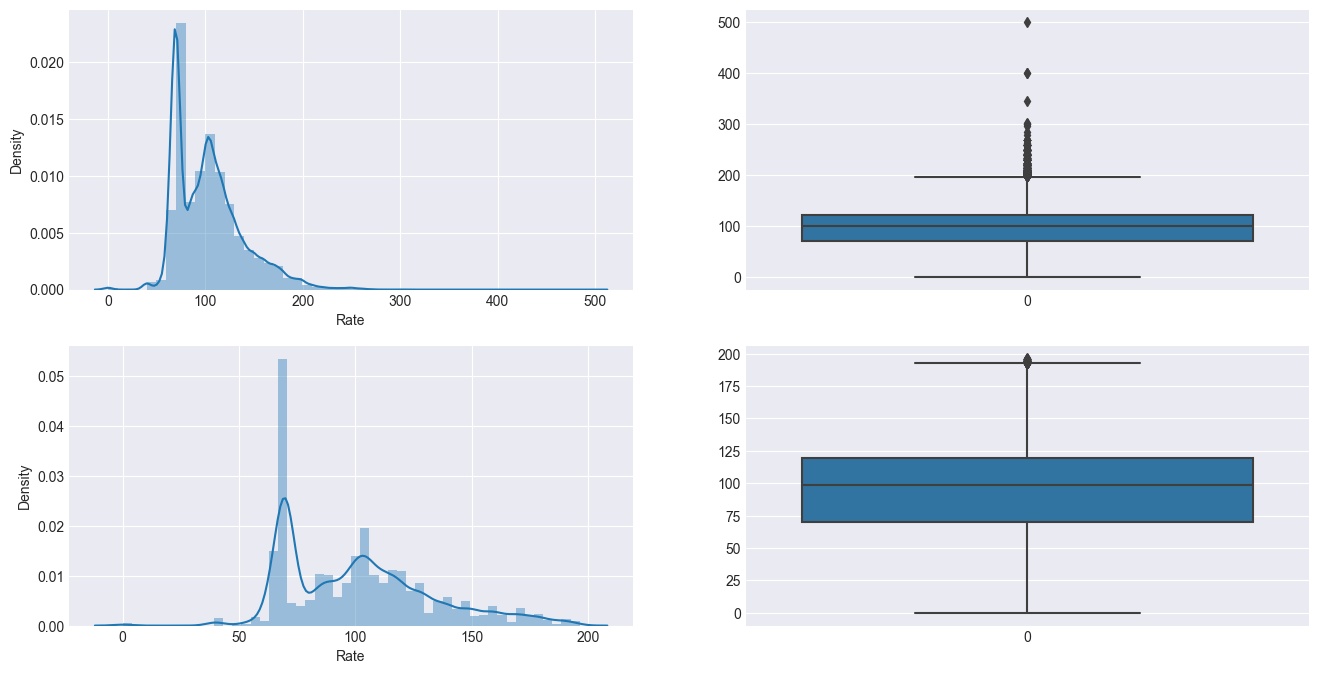

In [46]:
data1 = outlierRemoval(df2_1, 'Rate')

In [47]:
print('Original data shape         :', df.shape)
print('Outlier removal data shape  :', data1.shape)
print('Total records removal (IQR) :', df.shape[0]-data1.shape[0])

Original data shape         : (33744, 7)
Outlier removal data shape  : (33096, 7)
Total records removal (IQR) : 648


In [69]:
odf

,Date,Occupied,ADR
0,1/1/21,99,91.72
1,1/2/21,94,90.27
2,1/3/21,51,74.75
3,1/4/21,54,75.96
4,1/5/21,60,72.63
...,...,...,...
725,12/27/22,99,89.30
726,12/28/22,91,82.60
727,12/29/22,91,79.54
728,12/30/22,77,92.93


In [68]:
odf.drop(['Day', 'RoomRev'], axis=1, inplace=True)


In [72]:
display(occ_data.info())
occ_data = occ_data[occ_data['ADR'] != '(175.01)']
occ_data[occ_data['ADR'] == '(175.01)']
occ_data['ADR'] = occ_data.ADR.astype(float)
occ_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      730 non-null    object 
 1   Occupied  730 non-null    int64  
 2   ADR       730 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      730 non-null    object 
 1   Occupied  730 non-null    int64  
 2   ADR       730 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.8+ KB


In [76]:
occ_data = toDateFormat(odf, 'Date')

In [78]:
data_final_m1 = pd.merge(data1, odf, on='Date')
data_final_m1

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE,99,91.72
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE,94,90.27
2,2021-01-03,4,70.00,LPSS,NQQ,DIRECT,CORPORATE,51,74.75
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE,51,74.75
4,2021-01-03,5,70.00,LPSS,NQQ,DIRECT,CORPORATE,51,74.75
...,...,...,...,...,...,...,...,...,...
31858,2022-12-31,1,81.75,SNP,SNK,CRS,CORPORATE,87,98.90
31859,2022-12-31,1,134.00,SRTL,NHQQ,CRS,NaN,87,98.90
31860,2022-12-31,1,103.55,SCPM,NK,CRS,NaN,87,98.90
31861,2022-12-31,1,81.75,SNP,NK,CRS,CORPORATE,87,98.90


In [79]:
data_final_m1 = missingDateImputor(data_final_m1, 'Date') 

Min date : 2021-01-01 00:00:00 | Max date : 2022-12-31 00:00:00


,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE,99,91.72
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE,94,90.27
2,2021-01-03,4,70.00,LPSS,NQQ,DIRECT,CORPORATE,51,74.75
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE,51,74.75
4,2021-01-03,5,70.00,LPSS,NQQ,DIRECT,CORPORATE,51,74.75
5,2021-01-03,5,65.00,LMTB,NQQ,DIRECT,CORPORATE,51,74.75
6,2021-01-03,4,70.00,LHSE,NQQ,DIRECT,CORPORATE,51,74.75


,Date
0,2021-05-08
1,2021-07-10
2,2021-10-30
3,2021-12-24


,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR
0,2021-01-01,7.0,65.00,LPSS,NK,DIRECT,CORPORATE,99.0,91.72
1,2021-01-02,1.0,103.72,SRD Rate,NQQ,CRS,LEISURE,94.0,90.27
2,2021-01-03,3.0,70.00,LNST,NQQ,DIRECT,CORPORATE,51.0,74.75
3,2021-01-03,5.0,70.00,LPSS,NK,DIRECT,CORPORATE,51.0,74.75
4,2021-01-03,4.0,70.00,LBLO,NK,DIRECT,CORPORATE,51.0,74.75
...,...,...,...,...,...,...,...,...,...
31862,2022-12-31,1.0,109.00,BAR,NK,DIRECT,LEISURE,87.0,98.90
31863,2022-12-31,1.0,109.00,BAR,SNQQ1,DIRECT,CORPORATE,87.0,98.90
31864,2022-12-31,2.0,103.55,SCPM,NK,CRS,CORPORATE,87.0,98.90
31865,2022-12-31,1.0,102.94,LEXP,SNQQ,CRS,LEISURE,87.0,98.90


Size before date imputation :  31863
Size after date imputation  :  31867
Missing dates and values    :  Date          0
LOS           0
Rate          0
Rate Code     0
RoomType      0
Source        0
Track Code    0
Occupied      0
ADR           0
dtype: int64


In [99]:

data_final_m1

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE,99,91.72
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE,94,90.27
2,2021-01-03,3,70.00,LNST,NQQ,DIRECT,CORPORATE,51,74.75
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE,51,74.75
4,2021-01-03,4,70.00,LBLO,NK,DIRECT,CORPORATE,51,74.75
...,...,...,...,...,...,...,...,...,...
31862,2022-12-31,1,109.00,BAR,NK,DIRECT,LEISURE,87,98.90
31863,2022-12-31,1,109.00,BAR,SNQQ1,DIRECT,CORPORATE,87,98.90
31864,2022-12-31,2,103.55,SCPM,NK,CRS,CORPORATE,87,98.90
31865,2022-12-31,1,102.94,LEXP,SNQQ,CRS,LEISURE,87,98.90


In [ ]:
data_final_m1 = data_final_m1[['Date', 'Year', 'Month', 'Days', 'Nights', 'Type', 'RateCode', 'TrackCode', 'Rate', 
                             'Occupied', 'ADR']]

In [100]:
import holidays
from datetime import date

In [108]:
# US federal holiday calendar
us_holidays = holidays.US()

us_hld_date_temp = []
us_hld_occ_temp = []

for date, occasion in holidays.US(years=range(2021, 2022)).items():
#     print(f'{date} - {occasion}')
    us_hld_date_temp.append(date)
    us_hld_occ_temp.append(occasion)

In [102]:
def colRename(data, val1, val2):
    data.rename({val1:val2}, axis='columns', inplace=True)



In [103]:
# Converting to date formart
def toDateFormat(data, val1):
    data[val1] = pd.to_datetime(data[val1], errors='coerce')
    return data

In [109]:
# Holiday dataframe conversion
h_h = pd.DataFrame(list(zip(us_hld_date_temp, us_hld_occ_temp)),
               columns =['USHoliday', 'HolidayName'])

toDateFormat(h_h, 'USHoliday')
colRename(h_h, 'USHoliday', 'Date')

print(len(h_h))
h_h.tail()

15


,Date,HolidayName
10,2021-10-11,Columbus Day
11,2021-11-11,Veterans Day
12,2021-11-25,Thanksgiving
13,2021-12-25,Christmas Day
14,2021-12-24,Christmas Day (Observed)


In [111]:
import numpy as np
# Assign Non-holiday as NA to column "Holiday Name"

df_exp1['HolidayName'] = df_exp1.HolidayName.fillna('NA')

# Assign holiday status as 1 if there is holiday else 0 if non-holiday

df_exp1['IsHoliday'] = np.where(df_exp1['HolidayName'] == 'NA', 0,1)

In [112]:
df_exp1 = pd.merge(data_final_m1, h_h, on='Date', how='outer')
df_exp1

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR,HolidayName,IsHoliday
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE,99,91.72,New Year's Day,1
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE,94,90.27,NA,0
2,2021-01-03,3,70.00,LNST,NQQ,DIRECT,CORPORATE,51,74.75,NA,0
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE,51,74.75,NA,0
4,2021-01-03,4,70.00,LBLO,NK,DIRECT,CORPORATE,51,74.75,NA,0
...,...,...,...,...,...,...,...,...,...,...,...
31862,2022-12-31,1,109.00,BAR,NK,DIRECT,LEISURE,87,98.90,NA,0
31863,2022-12-31,1,109.00,BAR,SNQQ1,DIRECT,CORPORATE,87,98.90,NA,0
31864,2022-12-31,2,103.55,SCPM,NK,CRS,CORPORATE,87,98.90,NA,0
31865,2022-12-31,1,102.94,LEXP,SNQQ,CRS,LEISURE,87,98.90,NA,0


In [116]:
# Selecting non-NA records w.r.t. column RateCode (left side of data)
df = df_exp1[df_exp1['Rate Code'].notna()]
print(len(df), df['Rate Code'].isna().sum(), df.HolidayName.isna().sum())
df

31867 0 0


,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR,HolidayName,IsHoliday
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE,99,91.72,New Year's Day,1
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE,94,90.27,NA,0
2,2021-01-03,3,70.00,LNST,NQQ,DIRECT,CORPORATE,51,74.75,NA,0
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE,51,74.75,NA,0
4,2021-01-03,4,70.00,LBLO,NK,DIRECT,CORPORATE,51,74.75,NA,0
...,...,...,...,...,...,...,...,...,...,...,...
31862,2022-12-31,1,109.00,BAR,NK,DIRECT,LEISURE,87,98.90,NA,0
31863,2022-12-31,1,109.00,BAR,SNQQ1,DIRECT,CORPORATE,87,98.90,NA,0
31864,2022-12-31,2,103.55,SCPM,NK,CRS,CORPORATE,87,98.90,NA,0
31865,2022-12-31,1,102.94,LEXP,SNQQ,CRS,LEISURE,87,98.90,NA,0


In [117]:
df.HolidayName.value_counts()

NA                                                 31628
New Year's Day (Observed)                             90
Washington's Birthday                                 42
Memorial Day                                          21
Juneteenth National Independence Day (Observed)       19
Independence Day (Observed)                           16
Martin Luther King Jr. Day                            12
Labor Day                                             11
Veterans Day                                           9
Columbus Day                                           7
Christmas Day                                          7
New Year's Day                                         1
Juneteenth National Independence Day                   1
Independence Day                                       1
Thanksgiving                                           1
Christmas Day (Observed)                               1
Name: HolidayName, dtype: int64

In [118]:

df['DayOfWeekName'] = df['Date'].dt.day_name()
df['IsWeekend'] = np.where(df['DayOfWeekName'].isin(['Sunday', 'Saturday']), 1,0)

df

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR,HolidayName,IsHoliday,DayOfWeekName,IsWeekend
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE,99,91.72,New Year's Day,1,Friday,0
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE,94,90.27,NA,0,Saturday,1
2,2021-01-03,3,70.00,LNST,NQQ,DIRECT,CORPORATE,51,74.75,NA,0,Sunday,1
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE,51,74.75,NA,0,Sunday,1
4,2021-01-03,4,70.00,LBLO,NK,DIRECT,CORPORATE,51,74.75,NA,0,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31862,2022-12-31,1,109.00,BAR,NK,DIRECT,LEISURE,87,98.90,NA,0,Saturday,1
31863,2022-12-31,1,109.00,BAR,SNQQ1,DIRECT,CORPORATE,87,98.90,NA,0,Saturday,1
31864,2022-12-31,2,103.55,SCPM,NK,CRS,CORPORATE,87,98.90,NA,0,Saturday,1
31865,2022-12-31,1,102.94,LEXP,SNQQ,CRS,LEISURE,87,98.90,NA,0,Saturday,1


In [119]:
df = toIntValue(df, 'IsWeekend')
df = toIntValue(df, 'IsHoliday')

In [123]:
df.drop(['HolidayName', 'DayOfWeekName'], axis=1, inplace=True)

In [120]:
ddff = df.copy()

In [134]:
ddff

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR,HolidayName,IsHoliday,DayOfWeekName,IsWeekend
0,2021-01-01,7,65.00,LPSS,NK,DIRECT,CORPORATE,99,91.72,New Year's Day,1,Friday,0
1,2021-01-02,1,103.72,SRD Rate,NQQ,CRS,LEISURE,94,90.27,NA,0,Saturday,1
2,2021-01-03,3,70.00,LNST,NQQ,DIRECT,CORPORATE,51,74.75,NA,0,Sunday,1
3,2021-01-03,5,70.00,LPSS,NK,DIRECT,CORPORATE,51,74.75,NA,0,Sunday,1
4,2021-01-03,4,70.00,LBLO,NK,DIRECT,CORPORATE,51,74.75,NA,0,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31862,2022-12-31,1,109.00,BAR,NK,DIRECT,LEISURE,87,98.90,NA,0,Saturday,1
31863,2022-12-31,1,109.00,BAR,SNQQ1,DIRECT,CORPORATE,87,98.90,NA,0,Saturday,1
31864,2022-12-31,2,103.55,SCPM,NK,CRS,CORPORATE,87,98.90,NA,0,Saturday,1
31865,2022-12-31,1,102.94,LEXP,SNQQ,CRS,LEISURE,87,98.90,NA,0,Saturday,1


In [124]:
encoded_data = pd.get_dummies(df, columns = ['Rate Code', 'RoomType', 'Source', 'Track Code'])
print(encoded_data)

            Date  LOS    Rate  Occupied    ADR  IsHoliday  IsWeekend  \
0     2021-01-01    7   65.00        99  91.72          1          0   
1     2021-01-02    1  103.72        94  90.27          0          1   
2     2021-01-03    3   70.00        51  74.75          0          1   
3     2021-01-03    5   70.00        51  74.75          0          1   
4     2021-01-03    4   70.00        51  74.75          0          1   
...          ...  ...     ...       ...    ...        ...        ...   
31862 2022-12-31    1  109.00        87  98.90          0          1   
31863 2022-12-31    1  109.00        87  98.90          0          1   
31864 2022-12-31    2  103.55        87  98.90          0          1   
31865 2022-12-31    1  102.94        87  98.90          0          1   
31866 2022-12-31    1  109.00        87  98.90          0          1   

       Rate Code_BAR  Rate Code_GROUP~  Rate Code_LBEREV  ...  RoomType_SNK  \
0                  0                 0                 0

In [141]:
df.to_csv('./EXP2_lable_encoded.csv', index= False)

In [139]:
# Creating label encoder objects
lb_type1 = LabelEncoder()
lb_rateCode1 = LabelEncoder()
lb_trackCode1 = LabelEncoder()

In [140]:
# Fitting and transforimg data into numeric 
df['RoomType'] = lb_type1.fit_transform(df['RoomType'])
df['Rate Code'] = lb_rateCode1.fit_transform(df['Rate Code'])
df['Track Code'] = lb_trackCode1.fit_transform(df['Track Code'])
df['Source'] = lb_trackCode1.fit_transform(df['Source'])
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31867 entries, 0 to 31866
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        31867 non-null  datetime64[ns]
 1   LOS         31867 non-null  int64         
 2   Rate        31867 non-null  float64       
 3   Rate Code   31867 non-null  int64         
 4   RoomType    31867 non-null  int64         
 5   Source      31867 non-null  int64         
 6   Track Code  31867 non-null  int64         
 7   Occupied    31867 non-null  int64         
 8   ADR         31867 non-null  float64       
 9   IsHoliday   31867 non-null  int64         
 10  IsWeekend   31867 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 2.9 MB


,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR,IsHoliday,IsWeekend
0,2021-01-01,7,65.00,25,2,1,0,99,91.72,1,0
1,2021-01-02,1,103.72,103,3,0,1,94,90.27,0,1
2,2021-01-03,3,70.00,19,3,1,0,51,74.75,0,1
3,2021-01-03,5,70.00,25,2,1,0,51,74.75,0,1
4,2021-01-03,4,70.00,3,2,1,0,51,74.75,0,1


None

<AxesSubplot: >

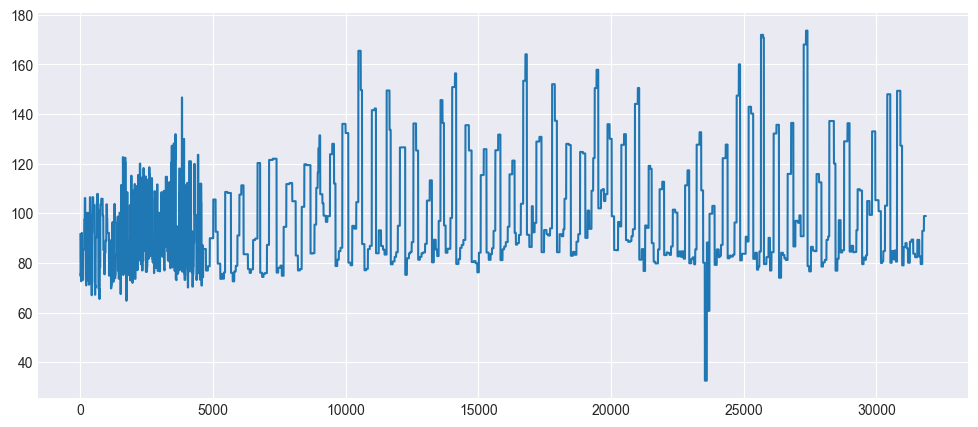

In [165]:
df['ADR'].plot(figsize=(12,5))

<AxesSubplot: >

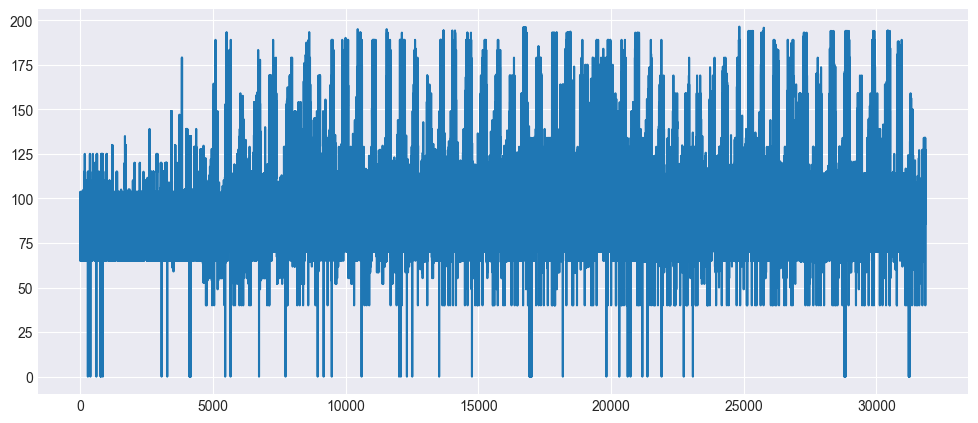

In [166]:
df['Rate'].plot(figsize=(12,5))

<AxesSubplot: >

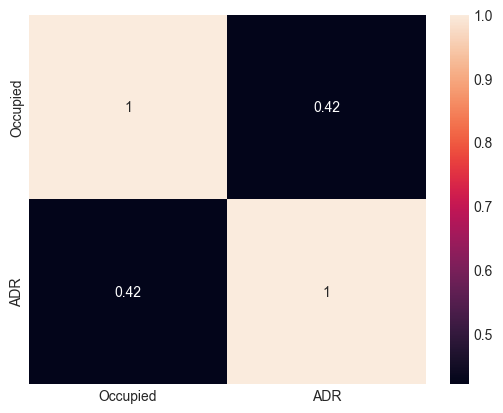

In [169]:
sns.heatmap(odf.corr(), annot=True)

In [155]:
df

,Date,LOS,Rate,Rate Code,RoomType,Source,Track Code,Occupied,ADR,IsHoliday,IsWeekend
0,2021-01-01,7,65.00,25,2,1,0,99,91.72,1,0
1,2021-01-02,1,103.72,103,3,0,1,94,90.27,0,1
2,2021-01-03,3,70.00,19,3,1,0,51,74.75,0,1
3,2021-01-03,5,70.00,25,2,1,0,51,74.75,0,1
4,2021-01-03,4,70.00,3,2,1,0,51,74.75,0,1
...,...,...,...,...,...,...,...,...,...,...,...
31862,2022-12-31,1,109.00,0,2,1,1,87,98.90,0,1
31863,2022-12-31,1,109.00,0,7,1,0,87,98.90,0,1
31864,2022-12-31,2,103.55,64,2,0,0,87,98.90,0,1
31865,2022-12-31,1,102.94,9,6,0,1,87,98.90,0,1


In [156]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.1/602.1 kB 341.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.3/987.3 kB 433.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 515.4 kB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [157]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Rate'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=296085.806, Time=26.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=310211.821, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=302895.769, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=296811.286, Time=3.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=310209.821, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=296093.637, Time=27.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=296335.548, Time=14.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=296113.556, Time=49.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=296094.390, Time=34.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=296486.450, Time=8.95 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=296339.367, Time=50.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=296199.876, Time=17.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=296465.657, Time=49.40 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=296083.904, Time=12.98 

In [158]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(31867, 11)
(31837, 11) (30, 11)


In [161]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Rate'],order=(2,1,2))
model=model.fit()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rate   No. Observations:                31837
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -147904.828
Date:                Wed, 01 Feb 2023   AIC                         295819.657
Time:                        19:20:53   BIC                         295861.499
Sample:                             0   HQIC                        295833.045
                              - 31837                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9100      0.015     59.868      0.000       0.880       0.940
ar.L2         -0.0376      0.007     -5.202      0.000      -0.052      -0.023
ma.L1         -1.6535      0.014   -115.243      0.000      -1.682      -1.625
ma.L2          0.6630      0.014     49.063      0.000       0.636       0.689
sigma2       638.5091      4.350    146.791      0.000     629.984     647.034
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2378.50
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: >

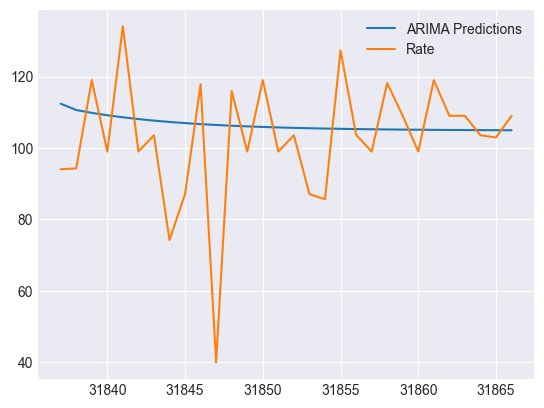

In [163]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Rate'].plot(legend=True)

In [164]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Rate'].mean()
rmse=sqrt(mean_squared_error(pred,test['Rate']))
print(rmse)

17.936830994969835


In [ ]:
def MACrossOver(data, shortWindow, longWindow):
  signals = pd.DataFrame(index=data.index)
  signals['tradeSignal'] = 0.0
  signals['MA20'] = data['Close'].rolling(window=shortWindow, 
                                                min_periods=1, center=False).mean()
  signals['MA100'] = data['Close'].rolling(window=longWindow, 
                                                         min_periods=1, center=False).mean()
  signals['tradeSignal'][shortWindow:] = np.where(signals['MA20'][shortWindow:] > signals['MA100'][shortWindow:], 1.0, 0.0)
  signals['finalSignal'] = signals['tradeSignal'].diff()
  return signals
newSeries = newSeries['2020-01-01':]
DATA = data['2020-01-01':]
fig = plt.figure(figsize= (15,6))
ax1 = fig.add_subplot(111, ylabel='CrudeOil price in $')
DATA["Adj Close"].plot(ax=ax1, lw=.6)
newSeries["MA20"].plot(ax=ax1, lw=2.)
newSeries["MA100"].plot(ax=ax1,  lw=2.)
ax1.plot(newSeries.loc[newSeries.finalSignal== 1.0].index, DATA["Adj Close"][newSeries.finalSignal == 1.0],'^', markersize=7, color='green')
ax1.plot(newSeries.loc[newSeries.finalSignal== -1.0].index, DATA["Adj Close"][newSeries.finalSignal == -1.0],'v', markersize=7, color='red')
plt.legend(["Adj Close Price","Short mavg","Long mavg","BuySignal","SellSignal"])
plt.title("Simple Moving Average Crossover Strategy")
plt.show()